# Carbon Dioxide Emissions Prediction Model

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Linear Regression Implementation using Batch Gradient Descent
This class defines a linear regression model that acceps the learning rate and the epochs (number of iterations for the batch gradient descent) as hyperparameters. There are essentailly two functions:
- `fit(X, Y)`: takes the features and the corresponding value to train the model
- `predict(X)`: takes a list of features and returns the model's predicted values


In [96]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=1000):
        self.learning_rate = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None


    def fit(self, X, Y):
        sample_count, feature_count = len(X), len(X[0])
        self.weights = [0] * feature_count
        self.bias = 0

        for _ in range(self.epochs):
            y_preds = [self.bias] * sample_count
            for i in range(sample_count):
                for fi in range(feature_count):
                    y_preds[i] += X[i][fi] * self.weights[fi]
            
            y_diff = [y_preds[i] - Y[i] for i in range(len(Y))]
            bias_diff = (2/sample_count) * sum(y_diff)

            weight_diff = [0] * feature_count
            for i in range(sample_count):
                for fi in range(feature_count):
                    weight_diff[fi] += 2*(X[i][fi] * y_diff[i])
            
            for fi in range(feature_count):
                weight_diff[fi] *= 1/sample_count
            
            self.bias -= self.learning_rate * bias_diff
            for fi in range(len(self.weights)):
                self.weights[fi] -= self.learning_rate * weight_diff[fi]
            

    def predict(self, X):
        res = [self.bias] * len(X)
        for i in range(len(X)):
            for fi in range(len(X[0])):
                res[i] += self.weights[fi] * X[i][fi]
        
        return res

#### Importing the data and dividing it into a training, testing and validation sets using a 60-20-20 split 

In [97]:
# Import the dataset and filter out unnecessary features
data = pd.read_csv("./data/CO2_Emissions.csv")

filtered_columns = [
    "Make",
    "Model",
    "Vehicle Class",
    "Transmission",
    "Fuel Type",
    "Cylinders"
]
data_x = data.drop(columns=['CO2 Emissions(g/km)', *filtered_columns])
data_y = data['CO2 Emissions(g/km)']

train_x, temp_x, train_y, temp_y = train_test_split(data_x, data_y, test_size=0.40, random_state=42)
validation_x, test_x, validation_y, test_y = train_test_split(temp_x, temp_y, test_size=0.50, random_state=42)

## Showing that the conditions for Linear Regression are met
The following are the conditions that determine whether linear regression is an appropriate model for a given problem:

- ***Linear relationship***: states that there should be a linear relationship between the dependent and independent variables. This shall be demonstrated for each of the features in our dataset.

- ***Homoscedasticity***: states that the variance of residuals should be consistent across all levels of the independent variables. This can also be demonstrated with the aforementioned graphs.

- ***No Multicollinearity***: states that independent variables must not be too highly correlated with each other.

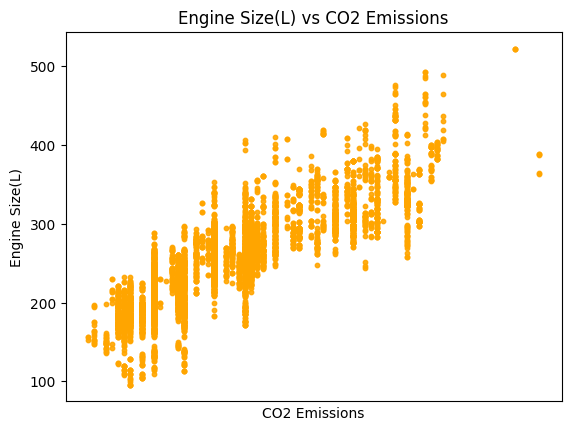

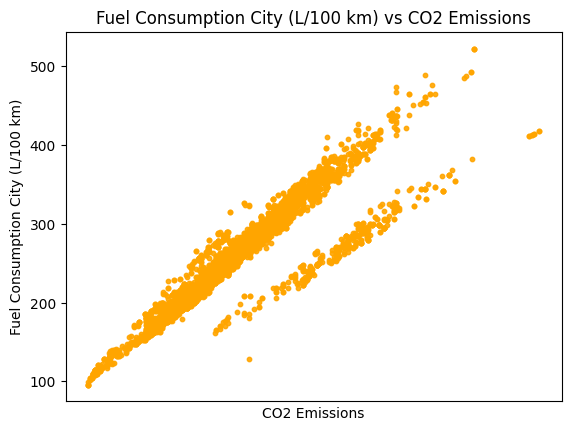

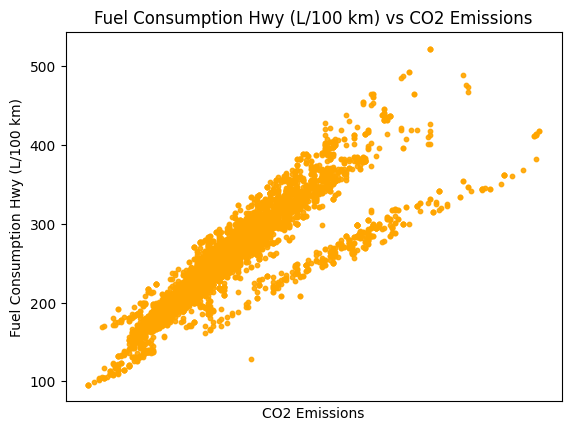

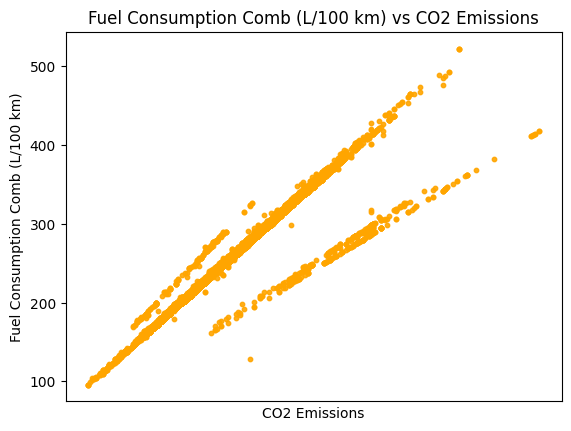

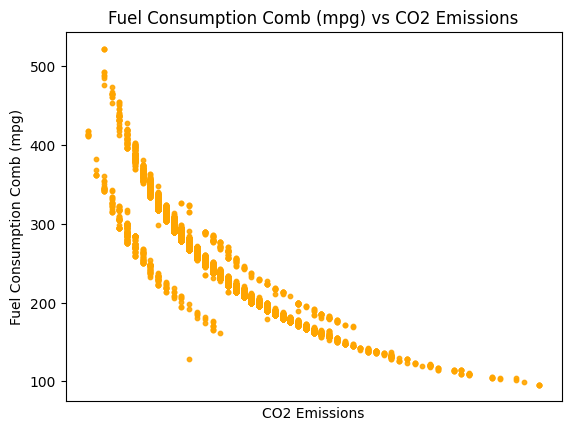

In [98]:
for feature in data_x.columns:
    plt.scatter(data_x[feature], data_y, s=10, c="orange", alpha=0.9)
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel("CO2 Emissions")
    plt.ylabel(feature)
    plt.xticks([])
    plt.show()

## Training the model and tuning the hyperparameters

The learning rate will be tweaked to find a good middleground among all the hyperparameters. The validation data subset will be used to establish the best pair of hyperparameters for this particular model.

In [ ]:
# Make several models using different learning rates and epochs and use the performance metric measures to check how well they perform
learning_rates = [0.00001, 0.0003, 0.0002, 0.0005, 0.0001]
models = [LinearRegression(lr=lr) for lr in learning_rates]

conv_train_x = train_x.values.tolist()
conv_train_y = list(train_y)

# Visualize features of the training data subset
train_x

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
5170,2.0,11.5,9.8,10.7,26
1779,3.5,12.3,8.5,10.6,27
4503,3.0,13.0,9.8,11.5,25
4588,1.8,4.8,5.5,5.1,55
1818,2.5,8.7,6.5,7.7,37
...,...,...,...,...,...
5191,2.0,10.3,7.4,9.0,31
5226,3.5,10.6,7.3,9.1,31
5390,3.5,11.7,8.8,10.4,27
860,2.5,9.5,7.4,8.6,33


In [107]:
# Visualize results of the training data subset
train_y

5170    251
1779    244
4503    270
4588    121
1818    177
       ... 
5191    210
5226    214
5390    242
860     198
7270    279
Name: CO2 Emissions(g/km), Length: 4431, dtype: int64

#### Train each model, run the test with the validation data subset and choose the best performing model

In [108]:
# Train each model
for model in models:
    model.fit(conv_train_x, conv_train_y)

# Run the tests for each model
def root_mean_squared(real_values, predicted_values):
    ms = 0
    for i in range(len(real_values)):
        # ms += pow(real_values[i] - predicted_values[i], 2)
        ms += abs(real_values[i] - predicted_values[i])
    
    ms /= len(real_values)
    return pow(ms, 0.5)

conv_validation_x = validation_x.values.tolist()
conv_validation_y = list(validation_y)

for i, model in enumerate(models):
    print(f"Model #{i+1} scored {root_mean_squared(conv_validation_y, model.predict(conv_validation_x))}")

Model #1 scored 4.987679088271492
Model #2 scored 3.6401123379441667
Model #3 scored 3.6341777248372633
Model #4 scored 3.6498512287979072


# Testing the Model

The testing data subset will be used along with the following performance metrics to evaluate the final version of the model:


### Defining functions for calculating the performance metrics